In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
plt.style.use("ggplot")

In [2]:
from glob import glob

data_folder = glob("../outputs/*")

tdfs = []

for folder in data_folder:
    files = glob(folder + "/*.csv")
    tdf = pd.concat([pd.read_csv(f) for f in files])
    tdf["generation"] = folder.split("/")[-1]
    tdfs.append(tdf)

data = pd.concat(tdfs)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,generation
0,Jynx,NaN,leftovers,oblivious,icebeam,substitute,calmmind,psychic,NaN,85,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,82.0,NaN,9
1,Parasect,NaN,leftovers,effectspore,aromatherapy,hiddenpowerbug,spore,gigadrain,NaN,85,...,NaN,30.0,30.0,NaN,30.0,NaN,NaN,91.0,NaN,9
2,Hypno,NaN,leftovers,insomnia,calmmind,psychic,firepunch,wish,NaN,85,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,84.0,NaN,9
3,Ditto,NaN,quickclaw,limber,transform,NaN,85,85,85.0,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,Mew,NaN,leftovers,synchronize,calmmind,thunderbolt,icebeam,psychic,NaN,85,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,76.0,NaN,9


Text(0.5, 0, 'Generation')

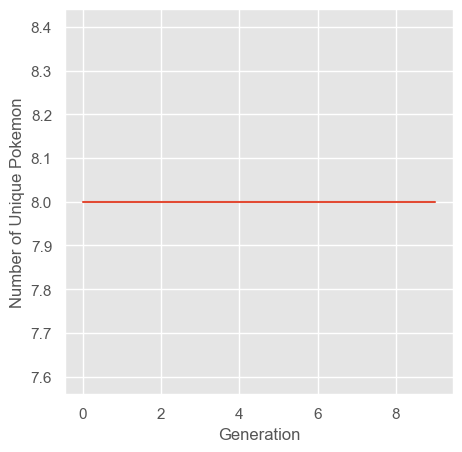

In [3]:
n_poke_per_gen = data.groupby("generation")["0"].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)

ax.plot(np.arange(len(n_poke_per_gen)), n_poke_per_gen)
ax.set_ylabel("Number of Unique Pokemon")
ax.set_xlabel("Generation")

In [4]:
n_poke_per_gen

generation
0    8
1    8
2    8
3    8
4    8
5    8
6    8
7    8
8    8
9    8
Name: 0, dtype: int64

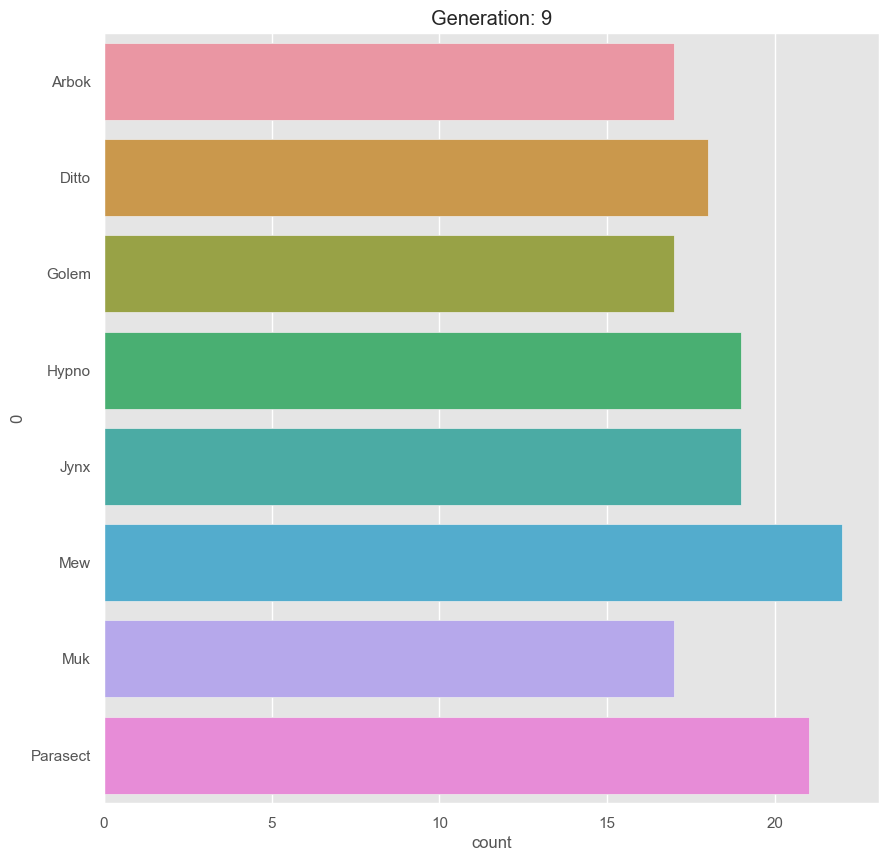

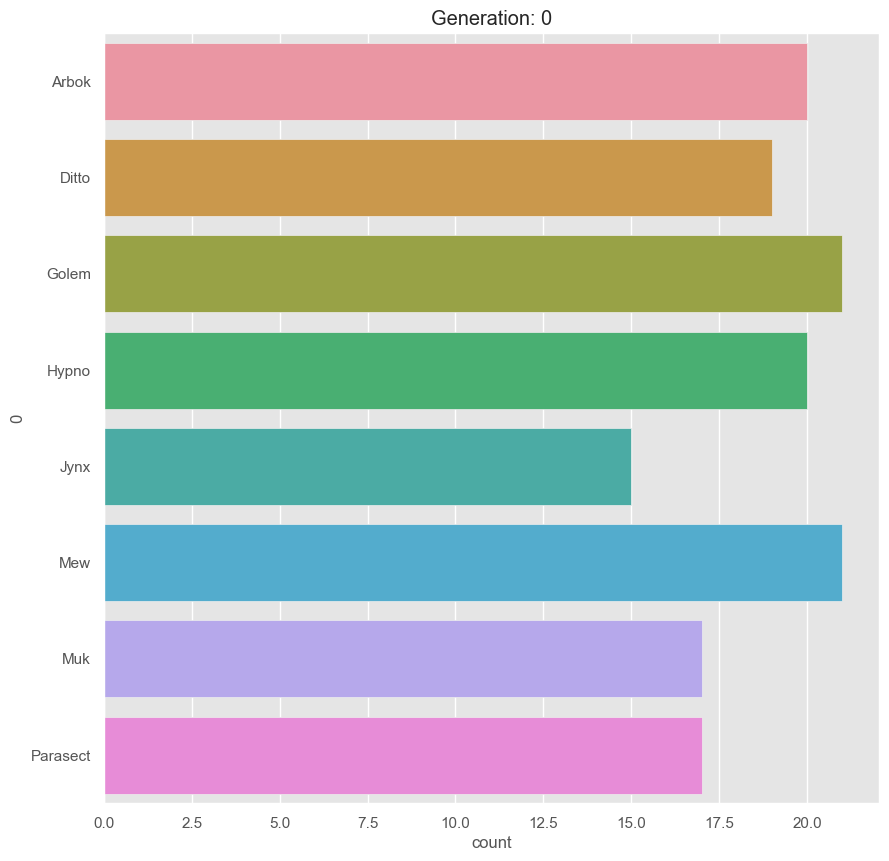

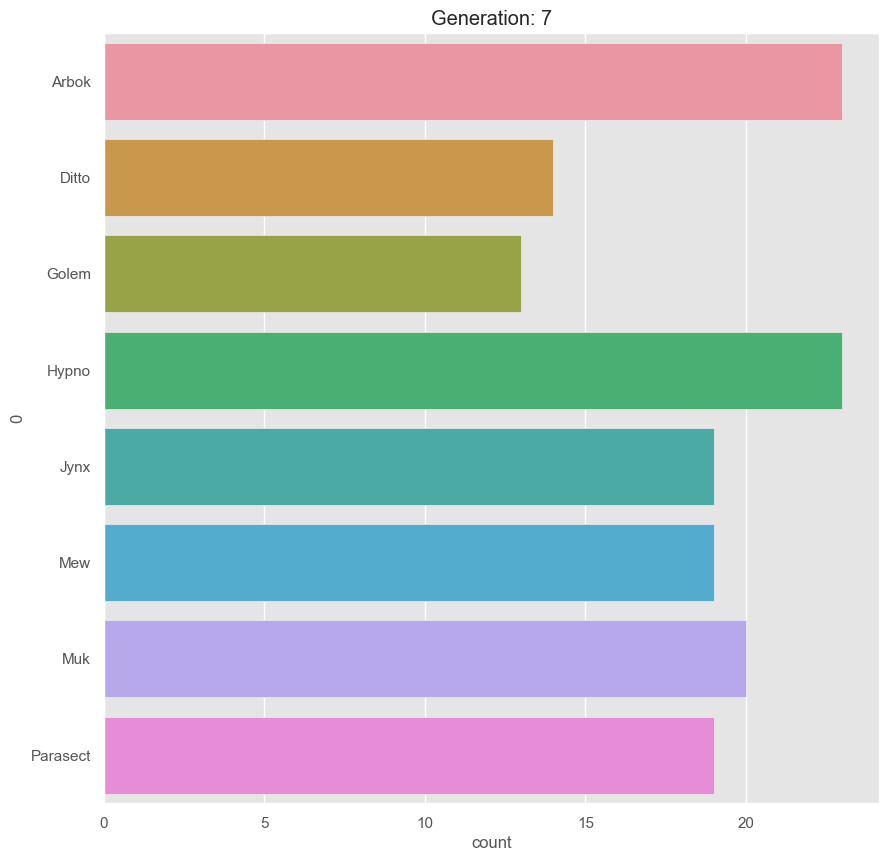

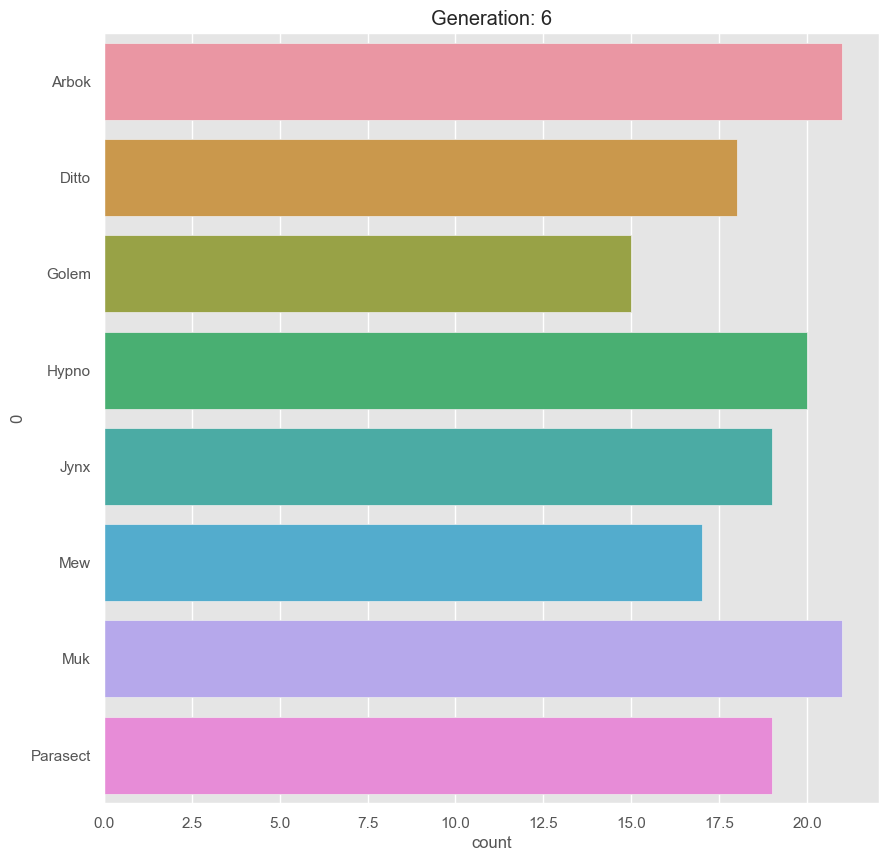

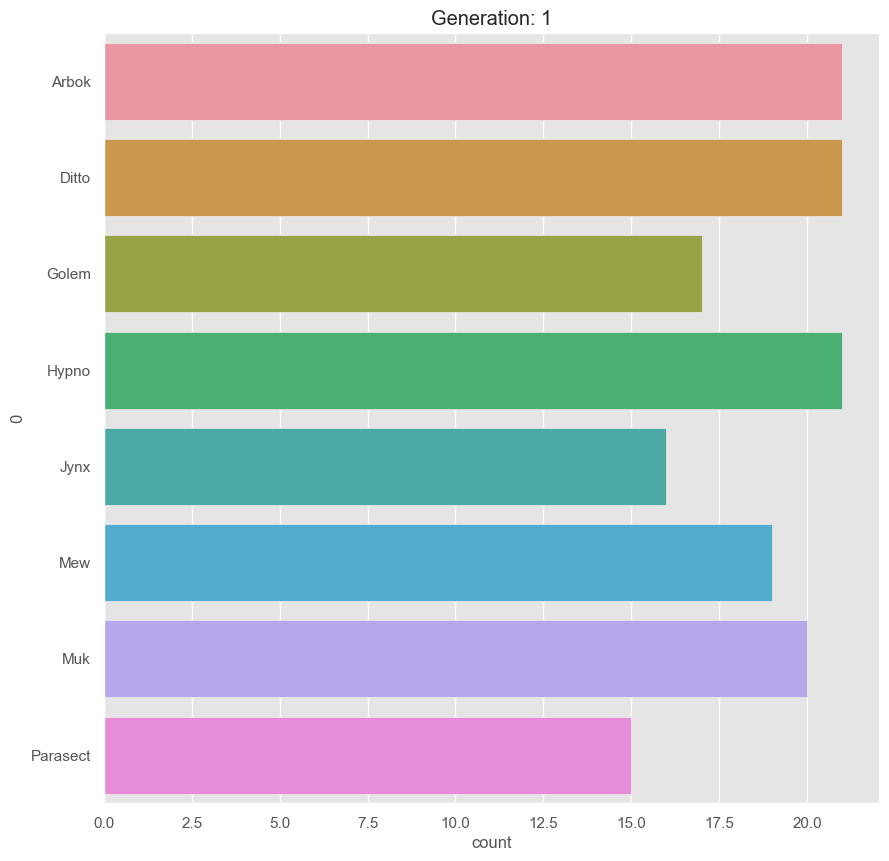

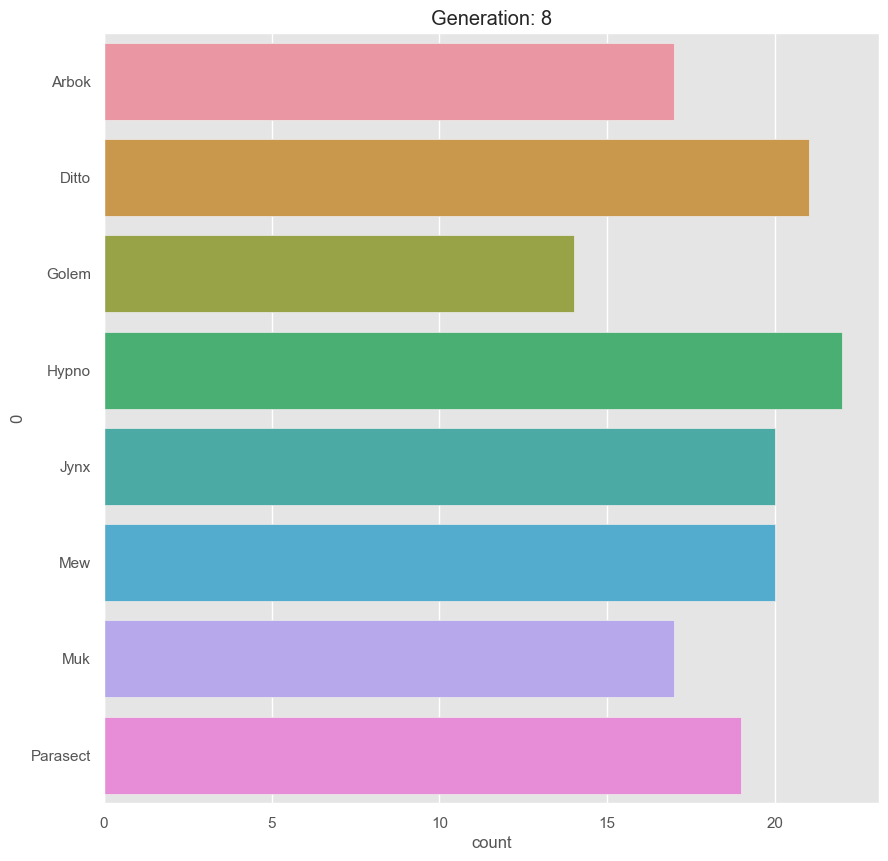

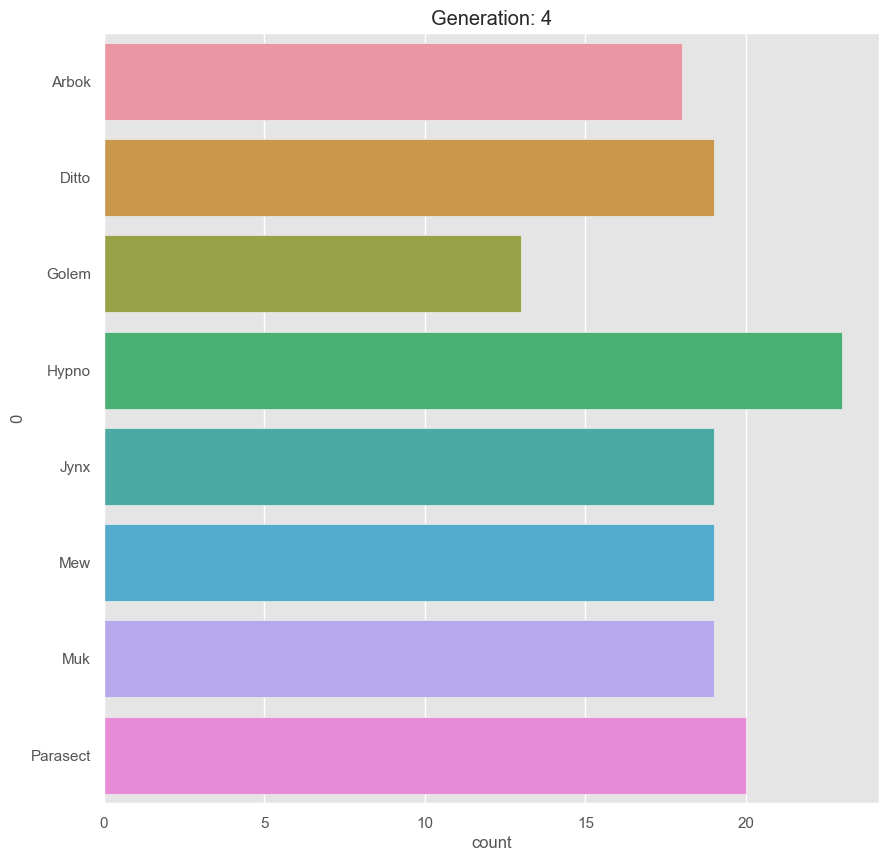

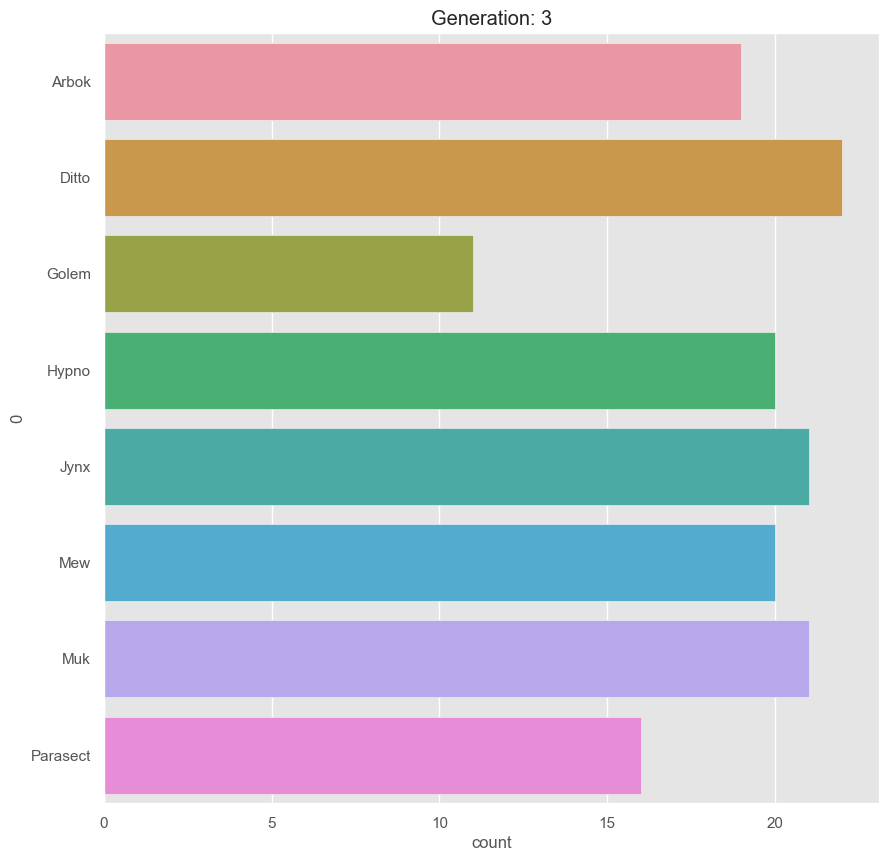

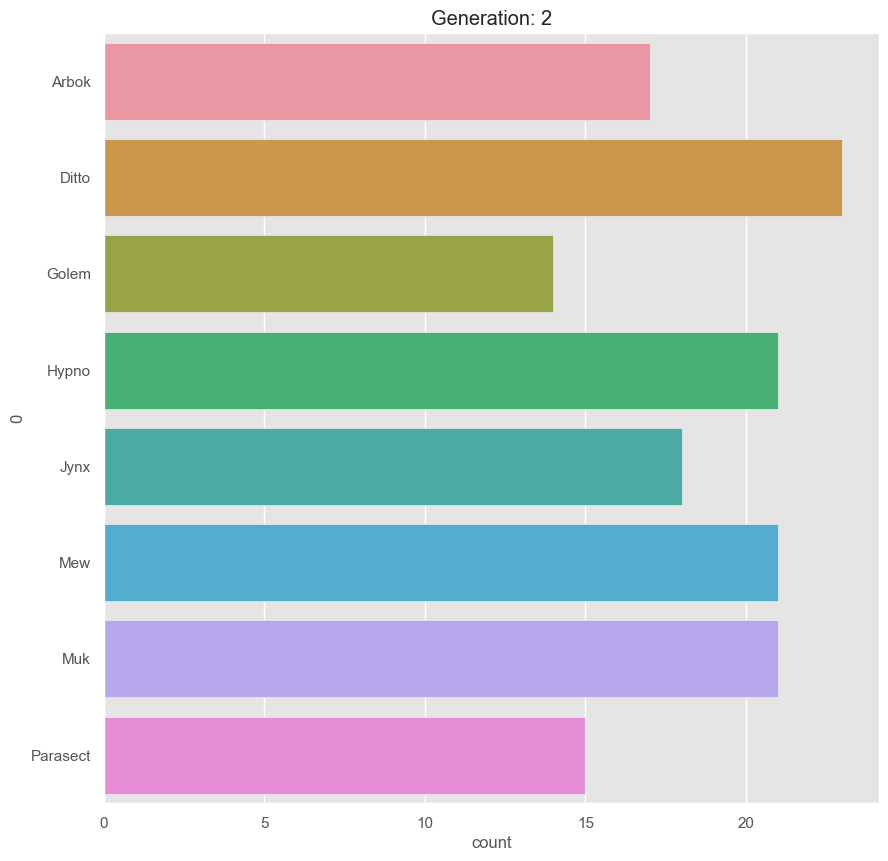

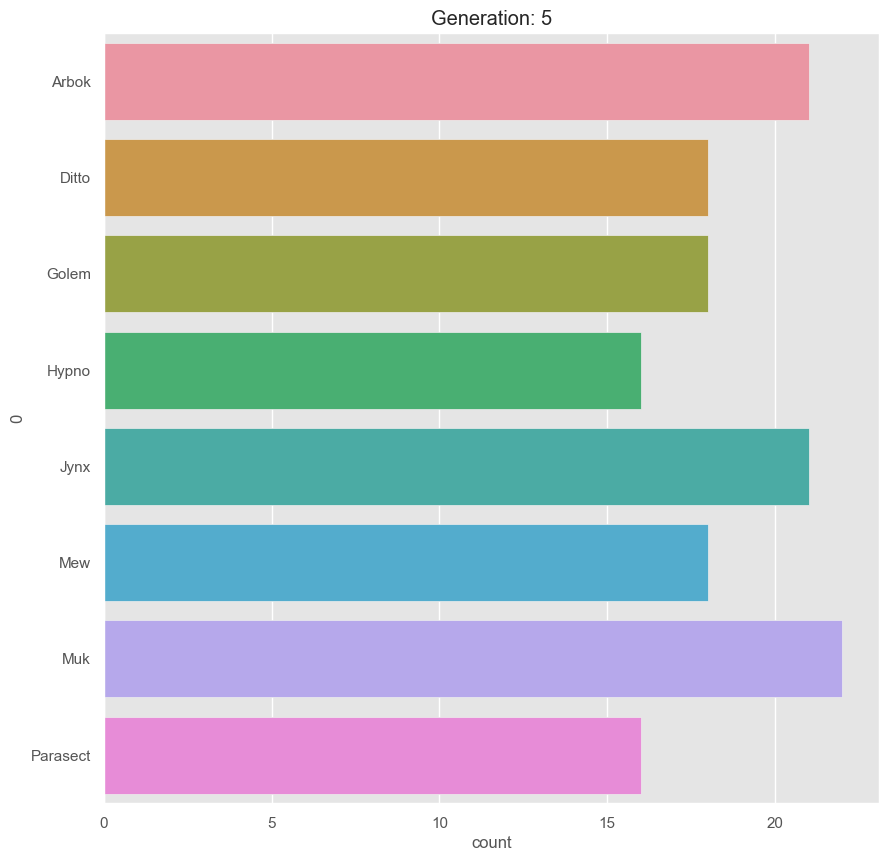

In [5]:
tmp = data.groupby(["0", "generation"])["0"].count().reset_index(name="count")
for gen in data.generation.unique():
    fig, ax = plt.subplots(1, figsize=(10, 10), dpi=100)
    sns.barplot(data=tmp[tmp["generation"] == gen], y="0", x="count", ax=ax)
    ax.set_title(f"Generation: {gen}")
    fig.savefig(f"{gen}.png")